# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name:  Samia Abrik

## Imports

Please do **not** import any other library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
from scipy.stats import norm, chi2, gaussian_kde

In [91]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [92]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [93]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [94]:
regions = list(df.region.unique())

In [95]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [96]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [97]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [98]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

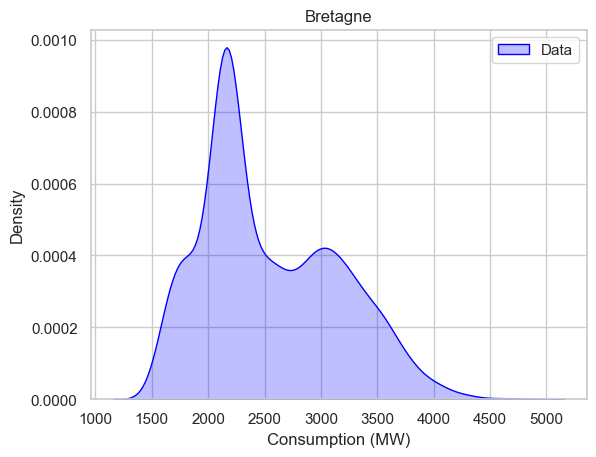

In [99]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

Your answer:

$$
\begin{align*}
\mathbb{E}(\hat \mu (X)) &= \mathbb{E}(\frac 1 n \sum_{i=1}^n X_i) \\
&=  \frac 1 n \sum_{i=1}^n \mathbb{E}(X_i) \\
&= \mathbb{E}(X_1) \\
&= \mu
\end{align*} 
$$
So we have $ \mathbb{E}(\hat \mu (X)) - \mu = 0 $ , then the estimator for the mean is unbiased.

$$
\begin{align*}
\mathbb{E}(\hat{\sigma^2}) &= \mathbb{E}(\frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2)\\
&= \frac 1 {n-1}\sum_{i=1}^n \mathbb{E}((x_i - \hat \mu)^2) \\
&= \frac 1 {n-1}\sum_{i=1}^n \sigma^2 \\
&= \frac n {n-1} \sigma^2
\end{align*}
$$
Since $ \mathbb{E}(\hat{\sigma^2} (X)) - \sigma^2 \neq 0 $, then the estimator for the variance is biased.

2. Give the values obtained for the mean and the standard deviation using these estimators.

In [100]:
def mean(x):
    n = len(x)
    return np.sum(x)/n

def var(x):
    n = len(x)
    m = mean(x) 
    s = 0
    for i in range(n):
        s += (x[i]-m)**2
    return s/(n-1)

data_bretagne = list(df_region['consumption'])
print('Using these estimators we get that the mean is equal to', mean(data_bretagne),'and the standard deviation is equal to',np.sqrt(var(data_bretagne))) 



Using these estimators we get that the mean is equal to 2546.536155666579 and the standard deviation is equal to 604.9429842099305


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [105]:
n = len(data_bretagne)
m = mean(data_bretagne)

variance = var(data_bretagne)

generated_data = np.random.normal(m,np.sqrt(variance),n)

print(generated_data)

[3885.28682354 1871.50547117 2760.11409943 ... 2046.69163132 2204.99880725
 2127.25804294]


4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

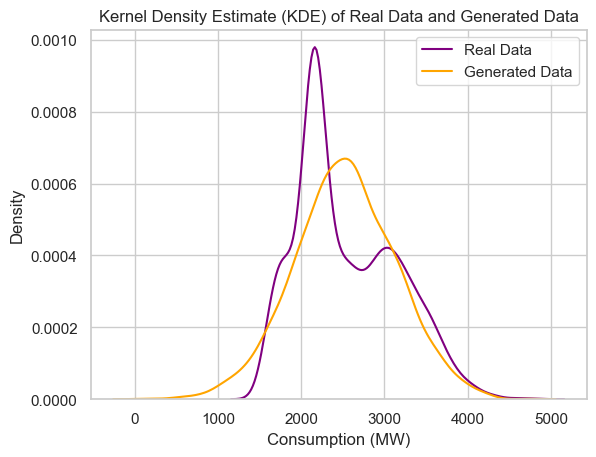

In [106]:
sns.kdeplot(data=data_bretagne, label="Real Data", color='purple')
sns.kdeplot(data=generated_data, label="Generated Data", color='orange')

plt.xlabel("Consumption (MW)")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) of Real Data and Generated Data")
plt.legend()
plt.show()

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

C:\Users\m\AppData\Local\Temp\ipykernel_6360\157698900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])


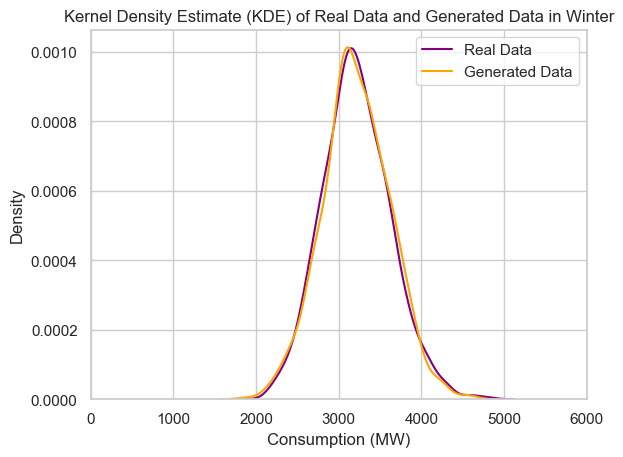

In [109]:
df_region['date'] = pd.to_datetime(df_region['date'])

# Filter the data for the winter period
winter_data = df_region[(df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2) | (df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21) | (df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)]
data_bretagne_winter = list(winter_data['consumption']) 
#winter_data.to_excel('winter.xlsx')

n_winter = len(data_bretagne_winter)
m_winter = mean(data_bretagne_winter)
variance_winter = var(data_bretagne_winter)
generated_data_winter = np.random.normal(m_winter,np.sqrt(variance_winter ),n_winter)

sns.kdeplot(data=data_bretagne_winter, label="Real Data", color='purple')
sns.kdeplot(data=generated_data_winter, label="Generated Data", color='orange')

plt.xlabel("Consumption (MW)")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) of Real Data and Generated Data in Winter")
plt.legend()
plt.xlim(0 , 6000 )
plt.show()

6. In which case the Gaussian model seems more appropriate?

We observe that the kernel dentisty estimate of the winter data looks exactly the same as the gaussian kde of the generated data. Therefore, the Gaussian model seems more appropriate in the case of the winter data.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answser:

Let's show that $d(f,g) \in [0,1]$ fisrt :
$$
\begin{align*}
0 \leq |f(x) - g(x)| \leq |f(x)| + |g(x)| &\implies 0 \leq \int |f(x) - g(x)| \mathrm dx \leq \underbrace{\int |f(x)| \mathrm dx}_\text{$= 1$} + \underbrace{\int |g(x)| \mathrm dx}_\text{$= 1$} \\
&\implies 0 \leq  \int |f(x) - g(x)| \mathrm dx \leq 2 \\
&\implies 0 \leq  \frac 1 2 \int |f(x) - g(x)| \mathrm dx \leq 1 \\
&\implies d(f,g) \in [0,1]
\end{align*}
$$
Plus we have :
$d(f,g)=0 \iff |f(x) - g(x)|=0 \quad \forall x$ where f and g are continuous $\iff f=g$ almost everywhere.

Suppose that $f$ and $g$ have disjoint supports. Let $supp(f)$ and $supp(g)$ be respectively the supprts of $f$ and $g$ respectively. Then $f$ is null on $supp(g)$ and $g$ is null on $supp(f)$. So we have :
$$
\begin{align*}
d(f,g) &=   \frac 1 2 \int |f(x) - g(x)| \mathrm dx \\
&=  \frac 1 2 (\int_{supp(f)} |f(x)| \mathrm dx + \int_{supp(g)} |g(x)| \mathrm dx)\\
&=  \frac 1 2 (\underbrace{\int f(x) \mathrm dx}_\text{$= 1$} + \underbrace{\int g(x) \mathrm dx}_\text{$= 1$} )\\
&= 1
\end{align*}
$$
Reciprocally, suppose that $d(f,g)=1$.





2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [46]:
x_values = np.linspace(-100000, 100000 , 1000)
dissimilarity = 0.5 * np.trapz(np.abs(gaussian_kde(generated_data)(x_values) - gaussian_kde(data_bretagne)(x_values)), x=x_values)


print("Dissimilarity measure :", dissimilarity)

Dissimilarity measure : 0.17156233997040582


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [47]:
x_values = np.linspace(-100000, 100000 , 1000)
dissimilarity = 0.5 * np.trapz(np.abs(gaussian_kde(generated_data_winter)(x_values) - gaussian_kde(data_bretagne_winter)(x_values)), x=x_values)

print("Dissimilarity measure :", dissimilarity)

Dissimilarity measure : 0.034617757235280454


We obtain that the dissimilarity between the kde of real data and the density of Gaussian model in the region Bretagne in winter $(d = 0.04)$ is inferior to the dissimilarity between the kde of real data and the density of Gaussian model in the region Bretagne for all seasons $(d = 0.17)$, which prooves that the Gaussian model is more appropriate in the case of winter data as mentionned in part A.

4. Do the same for all regions. Give the result as a single dataframe.

In [48]:
results = []

for region in regions :
    df_region = df[df.region == region]

    data_region = list(df_region['consumption'])

    n = len(data_region)
    m = mean(data_region)
    variance = var(data_region)
    generated_data = np.random.normal(m,np.sqrt(variance),n)

    # Filter the data for the winter period
    df_region['date'] = pd.to_datetime(df_region['date'])
    winter_data = df_region[(df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2) | (df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21) | (df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)]
    data_region_winter = list(winter_data['consumption']) 

    n_winter = len(data_region_winter)
    m_winter = mean(data_region_winter)
    variance_winter = var(data_region_winter)
    generated_data_winter = np.random.normal(m_winter,np.sqrt(variance_winter ),n_winter)

    x_values = np.linspace(-100000, 100000 , 1000)
    dissimilarity = 0.5 * np.trapz(np.abs(gaussian_kde(generated_data)(x_values) - gaussian_kde(data_region)(x_values)), x=x_values)
    dissimilarity_winter = 0.5 * np.trapz(np.abs(gaussian_kde(generated_data_winter)(x_values) - gaussian_kde(data_region_winter)(x_values)), x=x_values)

    result = {
        'Region': region,
        'Dissimilarity': dissimilarity,
        'WinterDissimilarity': dissimilarity_winter
    }
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df)

C:\Users\m\AppData\Local\Temp\ipykernel_6360\768053990.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])


C:\Users\m\AppData\Local\Temp\ipykernel_6360\768053990.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
C:\Users\m\AppData\Local\Temp\ipykernel_6360\768053990.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
C:\Users\m\AppData\Local\Temp\ipykernel_6360\768053990.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

                        Region  Dissimilarity  WinterDissimilarity
0         Auvergne-Rhône-Alpes       0.177190             0.038186
1      Bourgogne-Franche-Comté       0.129576             0.044127
2                     Bretagne       0.173281             0.036592
3          Centre-Val de Loire       0.200112             0.052586
4                    Grand Est       0.095792             0.049009
5              Hauts-de-France       0.132778             0.026751
6                    Normandie       0.167818             0.053921
7           Nouvelle-Aquitaine       0.222319             0.057643
8                    Occitanie       0.220271             0.056879
9             Pays de la Loire       0.146563             0.047104
10  Provence-Alpes-Côte d'Azur       0.229865             0.025995
11               Île-de-France       0.183999             0.050977


5. Which region is best fitted by a Gaussian model in winter?

The region that is best fitted by a Gaussian model in winter is the region that has the smallest dissimilarity between the kde of the real data and the density of the gaussian model, which is as we can see from the dataframe of the previous question is Hauts-de-France. 

PS : I obtained different results everytime i run the code but after running it multiple times i find that Hauts-de-France has the smallest dissimilarity in winter most of the times.

6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

C:\Users\m\AppData\Local\Temp\ipykernel_6360\2842557428.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])


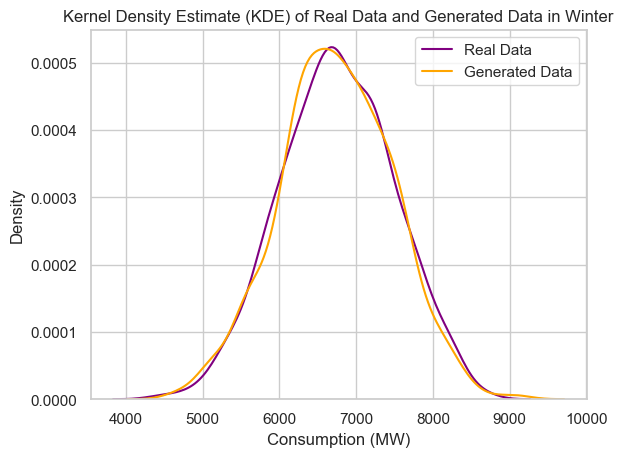

In [134]:
df_region = df[df.region == 'Hauts-de-France']

data_region = list(df_region['consumption'])

n = len(data_region)
m = mean(data_region)
variance = var(data_region)
generated_data = np.random.normal(m,np.sqrt(variance),n)

# Filter the data for the winter period
df_region['date'] = pd.to_datetime(df_region['date'])
winter_data = df_region[(df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2) | (df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21) | (df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)]
data_region_winter = list(winter_data['consumption']) 

n_winter = len(data_region_winter)
m_winter = mean(data_region_winter)
variance_winter = var(data_region_winter)
generated_data_winter = np.random.normal(m_winter,np.sqrt(variance_winter ),n_winter)

sns.kdeplot(data=data_region_winter, label="Real Data", color='purple')
sns.kdeplot(data=generated_data_winter, label="Generated Data", color='orange')

plt.xlabel("Consumption (MW)")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) of Real Data and Generated Data in Winter")
plt.legend()
plt.show()

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$ MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$ MW and standard deviation $\sigma_0=500$ MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer:

The posterior distribution of $\mu$ (after observation) follows from Bayes’ theorem:
$$ \pi(\mu \vert x) \propto p(x \vert \mu) \pi(\mu) $$
And we know that : $$\pi(\mu) = \frac 1 {\sqrt{2\pi{\sigma_0}^2}} e^{- \frac{ (\mu-\mu_0)^2}{2{\sigma_0}^2}}$$ and $$p(x \vert \mu) = \prod_{i=1}^{n}\frac 1 {\sqrt{2\pi{\sigma}^2}} e^{- \frac{ (x_i-\mu)^2}{2{\sigma}^2}} = \frac 1 {{\sqrt{2\pi{\sigma}^2}}^n}  e^{- \frac{ \sum_{i=1}^{n} (x_i-\mu)^2}{2{\sigma}^2}}$$
Therefore, the posterior distribution of $\mu$ : 
$$
\begin{align*}
\pi(\mu \vert x) &\propto  e^{- \frac{ (\mu-\mu_0)^2}{2{\sigma_0}^2}}e^{- \frac{ \sum_{i=1}^{n} (x_i-\mu)^2}{2{\sigma}^2}}\\
&\propto exp(-\frac 1 2 \frac{(\mu - \frac{\mu_0\sigma^2+S\sigma_0^2}{\sigma^2+n\sigma_0^2})^2}{\frac{(\sigma\sigma_0)^2}{\sigma^2+n\sigma_0^2}}) \\
\end{align*}
$$
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$ where $S = \sum_{i=1}^{n} x_i$

So the posterior distribution of $\mu$ is a gaussian distribution with mean $\frac{\mu_0\sigma^2+S\sigma_0^2}{\sigma^2+n\sigma_0^2}$ and variance $\frac{(\sigma\sigma_0)^2}{\sigma^2+n\sigma_0^2}$.

2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [139]:
region = "Bretagne"
df_region = df[df.region == region]

sigma = 400  # Standard deviation
mu0 = 3500  # Prior mean
sigma0 = 500  # Prior standard deviation

results = []

for y in [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]:

    df_region['date'] = pd.to_datetime(df_region['date'])
    winter_data_y = df_region[(df_region['date'].dt.year == y) & ( (df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2) | (df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21) | (df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22) )]
    consumption_y = list(winter_data_y['consumption']) 

    n = len(consumption_y)
    S = np.sum(consumption_y)
    
    mean = ( mu0 / (1 + n * (sigma0/sigma)**2 ) ) + ( S / ( (sigma0/sigma)**2 + n) ) # This is a simplified verison of the formula of the mean to not surpass the integer limit

    denominator = sigma*sigma + n*sigma0*sigma0
    variance = ( (sigma*sigma0)**2 ) /denominator
    
    result = {
        'Year': y,
        'Mean': mean,
        'Variance': variance
    }
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df)


    Year         Mean     Variance
0   2013  3309.977315  1765.225066
1   2014  3087.255130  1765.225066
2   2015  3135.735677  1765.225066
3   2016  3175.784460  1745.962462
4   2017  3218.717246  1765.225066
5   2018  3281.930898  1765.225066
6   2019  3163.257861  1765.225066
7   2020  3114.398910  1745.962462
8   2021  3308.524755  1765.225066
9   2022  3133.442161  1765.225066
10  2023  3082.600766  1984.126984


C:\Users\m\AppData\Local\Temp\ipykernel_6360\1666641504.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
C:\Users\m\AppData\Local\Temp\ipykernel_6360\1666641504.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
C:\Users\m\AppData\Local\Temp\ipykernel_6360\1666641504.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

C:\Users\m\AppData\Local\Temp\ipykernel_6360\3224869052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])


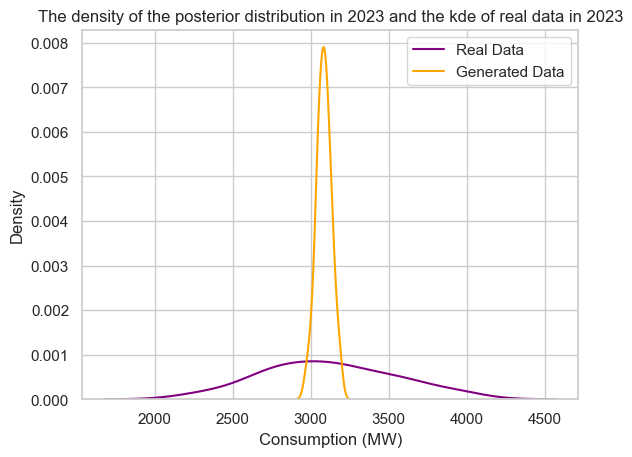

In [141]:
df_region['date'] = pd.to_datetime(df_region['date'])
winter_data_2023 = df_region[(df_region['date'].dt.year == 2023) & ( (df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2) | (df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21) | (df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22) )]
consumption2023 = list(winter_data_2023['consumption']) 

n = len(consumption2023)
S = np.sum(consumption2023)

mean = ( mu0 / (1 + n * (sigma0/sigma)**2 ) ) + ( S / ( (sigma0/sigma)**2 + n) ) 
denominator = sigma*sigma + n*sigma0*sigma0
variance = ( (sigma*sigma0)**2 ) /denominator

posterior_distribution = np.random.normal(mean,np.sqrt(variance),n)

sns.kdeplot(data=consumption2023, label="Real Data", color='purple')
sns.kdeplot(data=posterior_distribution, label="Generated Data", color='orange')

plt.xlabel("Consumption (MW)")
plt.ylabel("Density")
plt.title("The density of the posterior distribution in 2023 and the kde of real data in 2023")
plt.legend()
plt.show()

4. Discuss the results, comparing to those obtained in part A.

Your answer:

Since we added a prior knowledge on data, and we know now that $\mu$ is a guassian random variable, we can better estimate the mean of the consumption in winter, which explains why the density is so narrow ( small variance ) compared to the spread density where we had no prior knowledge on data like in part A.

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer:

Let the simple hypothesis $H_0 = \{\sigma = \sigma_0\}$ and $H_1 = \{\sigma = \sigma_1\}$ where $\sigma_0 = 400$ MV and $\sigma_1 = 500$ MV, and we let $\mu = 3200$ MV.

Then the test $\delta(x)=1_{\{\frac{p_1(x)}{p_0(x)} > c\}}$ is UMP at level $\alpha$, for any $c > 0$.
$$
\frac{p_1(x)}{p_0(x)} = \frac{e^{- \frac{ \sum_{i=1}^{n} (x_i-\mu)^2}{2{\sigma_1}^2}}}{e^{- \frac{ \sum_{i=1}^{n} (x_i-\mu)^2}{2{\sigma_0}^2}}} = e^{\frac s 2 (\frac 1 {\sigma_0}  - \frac 1 {\sigma_1})}\quad where \quad s =  \sum_{i=1}^{n} (x_i-\mu)^2
$$
Since $\sigma_0 < \sigma_1$, then this is an increasing function of S. Therefore the test becomes of the form $\delta(x) = 1_{\{s>c\}}$ where $c$ is another constant different from the first one.

We know that $\alpha = \mathbb{P}_{0}(\delta(X) = 1)$ so we have now $\alpha = \mathbb{P}_{0}(S>c)$.

Moreover, $S =  \sum_{i=1}^{n} (X_i-\mu)^2$ where $\frac{X_i-\mu}{\sigma_0}$ are i.i.d random variables $\sim \mathcal{N}(0,1)$, therefore $\frac S {{\sigma_0}^2} \sim \chi^2(n)$. 

We have then $1-\alpha = \mathbb{P}_{0}(S \leq c)$ and so $c = Q(1-\alpha)$ where $Q$ is the quantile function of  the $\chi^2(n)$ distribution.

Then the test that we propose will be $\delta(x) = 1_{\{s>c\}}$ with $c = Q(1-\alpha)$.


2. Provide the result of this test for $\alpha=1\%$.

In [52]:
region = "Bretagne"
df_region = df[df.region == region]
df_region['date'] = pd.to_datetime(df_region['date'])
winter2023_data = df_region[(df_region['date'].dt.year == 2023) &( (df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2) | (df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21) | (df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22) )]
data_bretagne_winter2023 = list(winter2023_data['consumption']) 

n = len(data_bretagne_winter2023)
c = chi2.ppf(0.99, n)
mu = 3200
s = 0
for x in data_bretagne_winter2023:
    s += (x-mu)**2

print('s =',s,'and','c =',c)

if s>c : print('We reject the null hypothesis, therefore, the standard deviation is equal to 500MW in winter.')
else : print('We accept the null hypothesis, therefore, the standard deviation is equal to 400MW in winter.')

s = 14600063 and c = 112.32879252029748
We reject the null hypothesis, therefore, the standard deviation is equal to 500MW in winter.


C:\Users\m\AppData\Local\Temp\ipykernel_6360\22723425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

C:\Users\m\AppData\Local\Temp\ipykernel_6360\3382565222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
C:\Users\m\AppData\Local\Temp\ipykernel_6360\3382565222.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])


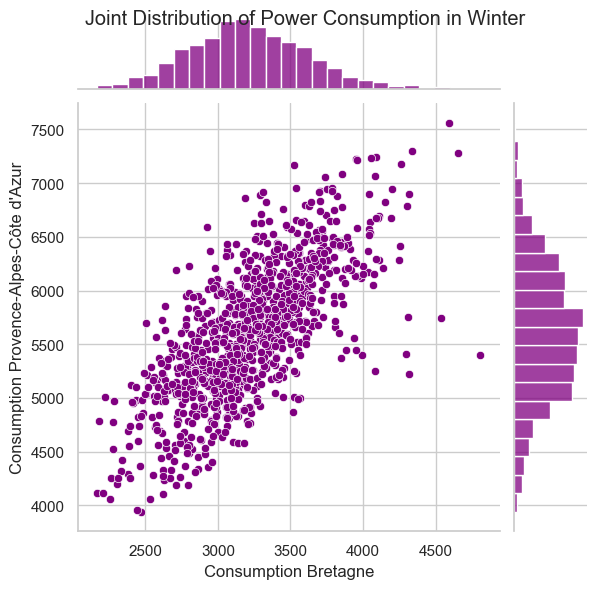

In [53]:
df_region = df[df.region == 'Bretagne']
df_region['date'] = pd.to_datetime(df_region['date'])
winter_data = df_region[(df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2) | (df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21) | (df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)]
consumption_Br = list(winter_data['consumption'])

df_region = df[df.region == "Provence-Alpes-Côte d'Azur"]
df_region['date'] = pd.to_datetime(df_region['date'])
winter_data = df_region[(df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2) | (df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21) | (df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)]
consumption_Pr = list(winter_data['consumption'])

df_winter = pd.DataFrame({'consumption Bretagne':consumption_Br,'consumption Provence-Alpes-Côte d\'Azur':consumption_Pr})

sns.set(style="whitegrid")
g = sns.jointplot(x='consumption Bretagne', y='consumption Provence-Alpes-Côte d\'Azur', data=df_winter, kind='scatter',color='purple')

g.ax_joint.set_xlabel('Consumption Bretagne')
g.ax_joint.set_ylabel('Consumption Provence-Alpes-Côte d\'Azur')
g.fig.suptitle('Joint Distribution of Power Consumption in Winter')
plt.show()

2. Do you think the power consumption in these two regions is independent?

Your answer:

The scatterplot points are not spread out across the entire plot and we can see that there is a pattern. In fact the points are more grouped close to a straight line. Therefore, i think that the power consumption in these two regions is not independent.

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

Your answer:

We would like to test the independence between the power consumption in Bretagne $(Br)$ and Provence-Alpes-Côte d'Azur $(Pr)$ in winter , i.e., we would like to test the null hypothesis $H_0 = \{Br \perp  Pr \}$ against $H_1 = \{Br \cancel{\perp}  Pr \}$
Let $A_1, . . . , A_K$ and $B_1, . . . , B_L$ of the corresponding value spaces and let $N_{ij}= \sum_{t=1}^{n} 1_{\{Br_t \in A_i , Pr_t \in B_j\}} $ , $N_{i}= \sum_{t=1}^{n} 1_{\{Br_t \in A_i\}} $ and $N_{j}= \sum_{t=1}^{n} 1_{\{Pr_t \in B_j\}} $

Then $\quad T(Br,Pr) = \sum \frac{(N_{ij} - \frac{N_i N_j}{n})^2}{\frac{N_i N_j}{n}} \longrightarrow \chi^2((K-1)(L-1))$

The test is then $\delta(x)=1_{\{ T(Br,Pr) > c\}}$ , at level $\alpha = \mathbb{P}_{0}(\delta(X) = 1) = \mathbb{P}_{0}(T(Br,Pr) > c)$ with $c = Q(1-\alpha)$ where $Q$ is the quantile function of  the $\chi^2((K-1)(L-1))$ distribution.


4. Give the result of this test for $\alpha=1\%$. 

In [54]:
c = chi2.ppf(0.99, n-1) # K = 2-1 and L = n-1

T = 0
n = len(consumption_Br)
S_Br = np.sum(consumption_Br)
S_Pr = np.sum(consumption_Pr)
N = S_Br + S_Pr
for i in range(n):
    Ne_Br = ((consumption_Br[i]+consumption_Pr[i])*S_Br)/N
    Ne_Pr = ((consumption_Br[i]+consumption_Pr[i])*S_Pr)/N

    T += (((consumption_Br[i] - Ne_Br)**2)/Ne_Br) + (((consumption_Pr[i] - Ne_Pr)**2)/Ne_Pr)

print('T =',T,'c =',c)
if T>c : print('We reject the null hypothesis, therefore, the power consumption in the two regions is not independent.')
else : print('We accept the null hypothesis, therefore, the power consumption in the two regions is independent.')


T = 45273226.88638614 c = 111.14401942288376
We reject the null hypothesis, therefore, the power consumption in the two regions is not independent.


C:\Users\m\AppData\Local\Temp\ipykernel_6360\3376255712.py:9: RuntimeWarning: overflow encountered in scalar multiply
  Ne_Br = ((consumption_Br[i]+consumption_Pr[i])*S_Br)/N
C:\Users\m\AppData\Local\Temp\ipykernel_6360\3376255712.py:10: RuntimeWarning: overflow encountered in scalar multiply
  Ne_Pr = ((consumption_Br[i]+consumption_Pr[i])*S_Pr)/N


## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption. 

Let $X_1, . . ., X_n$ be the daily power consumption in the region Bretagne in winter.

Let $\bar{X} = \frac 1 n \sum_{i=1}^{n} X_i$, then $\bar{X} \sim \mathcal{N}(\mu,\sigma^2)$ and so $Z = \frac{\sqrt{n}}{\sigma} (\bar{X}-\mu) \sim \mathcal{N}(0,1)$.

We want $\mathbb{P}( -c \leq Z \leq c) = 1 - \alpha$ with $c=Q(1-\frac \alpha 2)$ where $Q$ is the quantile function of the $\mathcal{N}(0,1)$ distribution.
$$
-c \leq Z \leq c \iff \frac{-c\sigma}{\sqrt{n}} \leq \bar{X}-\mu \leq \frac{c\sigma}{\sqrt{n}} \iff \mu \in [ \bar{X}-\frac{c\sigma}{\sqrt{n}},\bar{X}+\frac{c\sigma}{\sqrt{n}}]
$$
Therefore the confidence interval at level $\alpha=95\%$ for the mean power consumption is $[ \bar{X}-\frac{c\sigma}{\sqrt{n}},\bar{X}+\frac{c\sigma}{\sqrt{n}}]$

Let's compute it :

In [55]:
df_region = df[df.region == 'Bretagne']
df_region['date'] = pd.to_datetime(df_region['date'])
winter_data = df_region[(df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2) | (df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21) | (df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)]
consumption_Br = list(winter_data['consumption'])

n = len(consumption_Br)
alpha = 0.95
sigma = 400  
X_bar = np.sum(consumption_Br)/n
c = norm.ppf(1-alpha/2)
a,b= X_bar-c*sigma/np.sqrt(n) , X_bar+c*sigma/np.sqrt(n)
print('The confidence interval at level alpha = 95% for the mean power consumption : [',a,',',b,']')

The confidence interval at level alpha = 95% for the mean power consumption : [ 3213.377786261738 , 3214.9786292168774 ]


C:\Users\m\AppData\Local\Temp\ipykernel_6360\544619669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

We would like to test the null hypothesis $H_0=\{\mu = 3100\}$ against $H_1=\{\mu \neq 3100\}$

Let $X_1, . . ., X_n$ be the daily power consumption in the region Bretagne in 2023.

Let $\bar{X} = \frac 1 n \sum_{i=1}^{n} X_i$ and $V_0 = \frac 1 {n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2$.

Then $T = \frac {\bar{X}-\mu}{\sqrt{\frac {V_0} n}} \sim St(n-1)$.

The Student test is then $\delta(x) = 1_{\{3100 \quad\notin\quad [\bar{x}-c\sqrt{\frac {V_0} n},\quad\bar{x}+c\sqrt{\frac {V_0} n}]\}} = 1_{\{|\bar{x}-\mu|>c\sqrt{\frac {V_0} n}\}}$.

 At level $\alpha$, we get $c = Q(1-\frac {\alpha} 2)$ where $Q$ is the quantile function of $St(n-1)$ distribution.

In [56]:
df_region = df[df.region == 'Bretagne']
df_region['date'] = pd.to_datetime(df_region['date'])
winter_data2023 = df_region[(df_region['date'].dt.year == 2023) & ( (df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2) | (df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21) | (df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22) )]
X = list(winter_data2023['consumption']) 
n = len(X)
print(n)
X_bar = np.sum(X)/n

V0 = 0
for i in range(n):
    V0 += (X[i]-X_bar)**2
V0 = V0/(n-1)

c = norm.ppf(1-alpha/2) # n=80 is large enough to approximate the Student distribution to a normal distribution 

print('|X_bar - 3100| =',np.abs(X_bar-3100),', c√v0/n =',c*np.sqrt(V0)/n)
if np.abs(X_bar-3100)>c : print('We reject the null hypothesis, therefore, the mean consumption in 2023 is different from 3100MW .')
else : print('We accept the null hypothesis, therefore, the mean consumption in 2023 is equal to 3100MW.')

80
|X_bar - 3100| = 14.487500000000182 , c√v0/n = 0.3301479613070864
We reject the null hypothesis, therefore, the mean consumption in 2023 is different from 3100MW .


C:\Users\m\AppData\Local\Temp\ipykernel_6360\2060490777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
